In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
data = Path('Resources/lending_data.csv')
df = pd.read_csv(data)

# Review the DataFrame
# YOUR CODE HERE!
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = df["loan_status"]

# Separate the X variable, the features
# YOUR CODE HERE!
X = df.drop(columns="loan_status")

In [7]:
# Review the y variable Series
# YOUR CODE HERE!
print(f"Labels: {y[:10]}")

Labels: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64


In [9]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

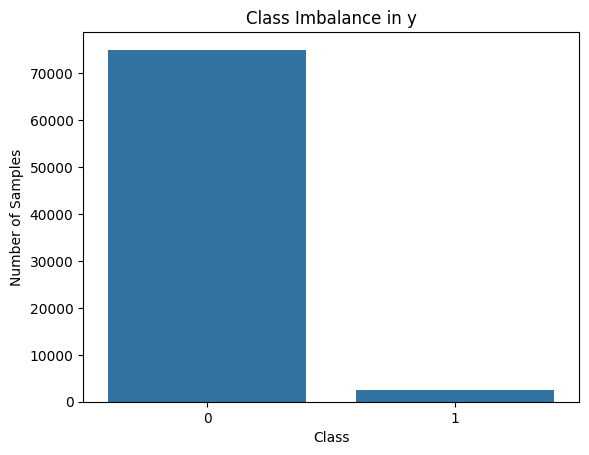

In [15]:
# Visualize any class imbalance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count the occurrences of each class in y
unique, counts = np.unique(y, return_counts=True)

# Create a bar plot to visualize class imbalance
sns.barplot(x=unique, y=counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in y')
plt.show()

#A lot more healthy loans than risky loans!

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [16]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)


# Fit the model using training data
# YOUR CODE HERE!
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
# YOUR CODE HERE!
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [19]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
test_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[18673    86]
 [   32   593]]


In [20]:
# Print the classification report for the model
# YOUR CODE HERE!
training_report = classification_report(y_test, predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



In [18]:
#Calculate accuracy score
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.993912505158894

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

The model performs extremely well for healthy loans (label 0), with near-perfect predictions.
The performance for high-risk loans (label 1) is also strong, but there is a small trade-off in terms of precision (87%) and recall (95%). It occasionally predicts high-risk loans incorrectly but does well overall.
The model is highly effective at predicting healthy loans, with slightly less but still strong performance for predicting high-risk loans. If your goal is to minimize the number of missed high-risk loans, you may consider tuning the model further or adjusting thresholds to improve recall for label 1 even more. This may be driven by the fact that there is a class imbalance in the dataset. There are more healthy loans in the dataset than risky loans. Specifically, 

Classification Report:
Precision
(1) For label 0 (healthy loan), precision is 1.00, meaning the model perfectly predicts healthy loans with no false positives.
(1) For label 1 (high-risk loan), precision is 0.87, indicating that 87% of the time when the model predicts a high-risk loan, it is correct.

Recall
(1) For label 0 (healthy loan), recall is 1.00, meaning the model correctly identifies all healthy loans.
(2) For label 1 (high-risk loan), recall is 0.95, meaning the model correctly identifies 95% of the high-risk loans. A small portion (5%) of high-risk loans is missed (false negatives).

F1 score
(1) For label 0 (healthy loan), the F1-score is 1.00.
(2) For label 1 (high-risk loan), the F1-score is 0.91, reflecting a very good balance between precision and recall for high-risk loans.

Accuracy
The overall accuracy of the model is 0.99, meaning that 99% of the predictions (both healthy and high-risk loans) are correct.

Confusion Matrix:
(1) For label 0 (healthy loans): The model does exceptionally well with 18,673 true negatives (correctly predicted healthy loans) and only 86 false positives (healthy loans incorrectly predicted as high-risk).
(2) For label 1 (high-risk loans): The model has 593 true positives (correctly predicted high-risk loans) and 32 false negatives (high-risk loans incorrectly predicted as healthy).

---